# Python for Data Science

Exercise to analyse, visualize and present gapminde dataset.

## Instructions
To complete the miniproject, create an analysis in jupyter-notebook which does the following:

Read in the gapminder_clean.csv data as a pandas DataFrame.

Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing `CO2 emissions (metric tons per capita)` and `gdpPercap for the filtered data`.

On the filtered data, calculate the pearson correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the Pearson R value and associated p value?

On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step...

Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

Now, without further guidance, use your Python Data Science skills (and the correct statistical tests) to answer the following:

What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)
Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' since 1962?
For each question, you should generate summary visualizations (preferrably interactive ones) that demonstrate your answer to each question.

Additionally, the analysis must be user-friendly for a non-programmer and should intuitively convey the insights you uncovered. Use markdown to ensure that the text is organized and readable. The notebook should also be friendly for a non-programmer to read.

All code should be commited using git and pushed to your fork of the training repo on GitHub. Once you are done, let Henry know and he will check your notebook.



## Load libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pltx
import numpy as np
from scipy.stats import pearsonr
import seaborn as sbs


Load data and filter rows containing only `1962`

In [2]:
my_data = pd.read_csv("../data/gapminder_clean.csv")

my_data_1962 = my_data[my_data["Year"] == 1962] 

my_data.head()

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439


## Scatter plot of the global `CO2 emissions` and `GDPperCap` in 1962.


In [3]:
#Extract the columns

data_1962 = my_data[["CO2 emissions (metric tons per capita)", "gdpPercap"]]

#drop rows with NaNs
#pd.isna(data_1962).sum() # 64/259 nas
data_1962 = data_1962.dropna()

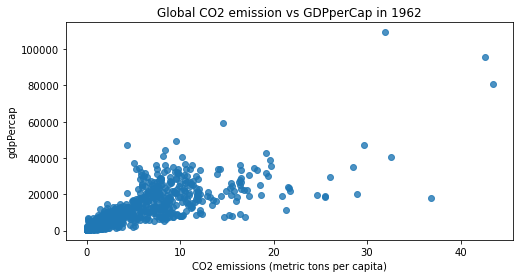

In [4]:
#Plt function from matplotlib
x = data_1962["CO2 emissions (metric tons per capita)"]
y = data_1962["gdpPercap"]

plt.figure(figsize=(8,4))
plt.scatter(x,y, alpha=0.8)
plt.xlabel("CO2 emissions (metric tons per capita)")
plt.ylabel("gdpPercap")
plt.title("Global CO2 emission vs GDPperCap in 1962")
plt.show()


## Pearson Correlation of `CO2 emissions and GDP per capita.
Detemining the pearson R and P values!

Pearson correlation is the measure of strength of linear association between two variables and is denotated by *r*. 
When:
    *r=0* - no correlation
    *r>0* - positive correlation
    *r<0* - negative correlatio

The `pearsonr()` from `scipy` library will be used in here. 
`x` is the `CO2 emissions` and `y` is `GDP per capita`

links
[correlations](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)


In [5]:
#Correlation by dropping all rows with NANs

data = my_data_1962[["CO2 emissions (metric tons per capita)", "gdpPercap"]]
data = data.dropna()
corr, pvalue = pearsonr(
    data["CO2 emissions (metric tons per capita)"], data["gdpPercap"])
print("The pearson's correlation is", round(corr,3), "and a p-value of", round(pvalue, 3))


The pearson's correlation is 0.926 and a p-value of 0.0


The pearson's correlation is `0.926` and a p-value of pretty much `0`. There exists a moderate correlation between `C02 emissions` and `GDP per capita` 

## Comparing correlation between years `CO2 emissions vs gdppacap`

In [6]:
#drop rows with# nans
data_all = my_data[["continent", "Year", "pop",
                    "CO2 emissions (metric tons per capita)", "gdpPercap"]]
#data_all.head()
df = pd.DataFrame(data_all.isna().sum())
df


,0
continent,1323
Year,0
pop,1323
CO2 emissions (metric tons per capita),414
gdpPercap,1323


In [7]:

data_all = data_all.dropna()
period = data_all["Year"].unique() #Get a list of the periods

#create a dict of each year and respective observations#for year in period:
df_dict = {}
for year in period:
    df_dict[year] = data_all[data_all["Year"] == year]
df_dict
xy_dict = {} #create a dict of year and necessary columns
for year in period:
   xy_dict[year] = df_dict[year]["CO2 emissions (metric tons per capita)"], df_dict[year]["gdpPercap"]

correlation_data = {} #dictionary of the correlation values and years
for year in xy_dict:
    #print(len(xy_dict[year][1]), len(xy_dict[year][0]))
    corr,_ = pearsonr(xy_dict[year][0], xy_dict[year][1])
    correlation_data[year] = corr

correlation_data_df = pd.DataFrame(list(correlation_data.items()))


correlation_data_df.columns = ["Year","pearsonr_correlation"]
print(correlation_data_df)

#determine year with maximum correlation.
year_max_corre = max(correlation_data,key=correlation_data.get)
max_corre = max(correlation_data.values())
print(" Year with maximum correlation is", year_max_corre, "with a maximum correlation of ~", "{:.2f}".format(max_corre))


   Year  pearsonr_correlation
0  1962              0.926082
1  1967              0.938792
2  1972              0.842899
3  1977              0.792834
4  1982              0.816638
5  1987              0.809553
6  1992              0.809432
7  1997              0.808140
8  2002              0.800642
9  2007              0.720417
 Year with maximum correlation is 1967 with a maximum correlation of ~ 0.94


Filter Dataset to the year with highest correlation and create a scatter plot between `CO2 emission` and `gdpPaCap`

Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

In [8]:
data_1967 = my_data[my_data["Year"] == 1967]
corr_data = data_1967[[
    "pop", "continent", "CO2 emissions (metric tons per capita)", "gdpPercap"]]

corr_data = corr_data.dropna()  # the data has missing data which we drop here

#Since the population values are extremely large, we get their log10 forms

corr_data["pop_log"] = np.log10(corr_data[["pop"]])

corr_data.head()


,pop,continent,CO2 emissions (metric tons per capita),gdpPercap,pop_log
1,11537966.0,Asia,0.123782,836.197138,7.062129
11,1984060.0,Europe,1.363746,2760.196931,6.297555
21,12760499.0,Africa,0.632118,3246.991771,7.105868
51,5247469.0,Africa,0.166659,5522.776375,6.719950
81,22934225.0,Americas,2.858163,8052.953021,7.360484


In [9]:
import plotly.express as px

fig = px.scatter(corr_data, 
                 x="CO2 emissions (metric tons per capita)", 
                 y="gdpPercap", 
                 color="continent",
                 size="pop_log")
fig.show()


Now, without further guidance, use your Python Data Science skills (and the correct statistical tests) to answer the following:

What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)


In [10]:
#Relationship between continent vs Energy used.
#Calculate mean consumption for each continent
energy_data = my_data[["continent", "Year",
                       "Energy use (kg of oil equivalent per capita)"]]
#remove missing data
energy_data = energy_data.dropna()

#Calculate mean consumption for each column
mean_dictionary = {}

for i in energy_data["continent"].unique():
    mean = energy_data[energy_data["continent"] == i]["Energy use (kg of oil equivalent per capita)"].mean()
    mean_dictionary[i] = mean

mean_dictionary_df = pd.DataFrame(list(mean_dictionary.items()))
mean_dictionary_df.columns = ["continent","Average energy consumption (Kg)"]
#energy_data.to_csv("average.csv")

In [11]:

fig = pltx.bar(mean_dictionary_df,
               y="Average energy consumption (Kg)",
               x="continent",
               orientation="v",
               color="continent",
               width=600,
               height=700,
               title="Average Energy consumption by Continent (Kg)"
               )

fig.show()


How about we transpose the dataset

In [12]:
energy_data_t = energy_data.pivot_table(index=["Year"], columns="continent").droplevel(0,axis=1)
energy_data_t = energy_data_t.reset_index(drop=False, inplace=False)
energy_data_t

continent,Year,Africa,Americas,Asia,Europe,Oceania
0,1962,NaN,5113.073215,1003.752254,1786.923933,2482.218093
1,1967,NaN,6183.556112,1720.549744,2178.226794,2940.750732
2,1972,624.271781,1379.249574,1193.863297,2852.799023,3326.183702
3,1977,669.655049,1458.864502,1330.101303,3161.455380,3863.138379
4,1982,740.649440,1441.674520,1624.675685,3219.131342,3915.230457
5,1987,736.564835,1480.153739,1793.860708,3593.080919,4112.666572
6,1992,692.362311,1558.675537,1808.378056,3202.796260,4383.846070
7,1997,720.895102,1657.638067,2264.899455,3414.196077,4864.178383
8,2002,709.606764,1825.013654,2322.226805,3575.239271,4953.510758
9,2007,690.342727,2141.660257,2513.263757,3721.313840,4961.421051


In [13]:
fig = pltx.line(energy_data_t, x="Year", y=energy_data_t.columns)
fig.update_yaxes(title="Energy consumption (Kg)")
fig.show()

Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

Approach

Determine the difference of means of imported goods (t-test). T-test inferes significant difference between the two means

[reading from here](https://www.investopedia.com/terms/t/t-test.asp)[here](https://www.statology.org/paired-vs-unpaired-t-test/) and [here](https://www.youtube.com/watch?v=CIbJSX-biu0)

Perform a two sample hypothesis testing. Null Hypothesis will be *There is no significant difference on goods and services imported between Asia and Europe* i.e means of both groups are the same, (m1=m2).

Since these samples are unpaired, an independent t-test will suffice. Check for homogeinity of variance between the samples using [levene](https://www.scalestatistics.com/levenes-test.html) t-test. Many statistical tools make assumptions that groups do have equal variances, and levenes test allows you to determine whether this assumptoin is true. If p-value is >.05,homogeinity in variance exists (equal variances), else different variances


In [30]:
#my_data.head()
imports_data = my_data[["continent","Year",
                        "Imports of goods and services (% of GDP)"]]
continent = ["Asia","Europe"]
imports_data = imports_data.loc[imports_data["continent"].isin(continent)].loc[imports_data["Year"] > 1990] # select data past 1990
imports_data = imports_data.dropna()

#Get data for each continent
Europe = imports_data[imports_data["continent"] == "Europe"]["Imports of goods and services (% of GDP)"]
Asia = imports_data[imports_data["continent"] == "Asia"]["Imports of goods and services (% of GDP)"]

#We comparing differences between two independendt groups making this suitable for unpaired t-test
#Check whether there exists variation between the samples using leven test (homogeinity of variance)
variance = stats.levene(Asia, Europe)
print(variance) #gives a p-value of < .05. No variance exists

#Run the t-test
res = stats.ttest_ind(a=Europe,b=Asia,equal_var=False) 
res


LeveneResult(statistic=14.492912922394106, pvalue=0.00018461387781129707)


Ttest_indResult(statistic=-1.3552198505869208, pvalue=0.1775691189807696)

Levene's Test gives a p-value of < .05 (0.00018), hence no variance homogeinity between the groups. The independent T-test results to a p-value of > 0.05 (0.1775).
There exists significant difference in goods and services imported between Europe and Asia.

count    114.000000
mean      41.789241
std       16.721352
min       17.345130
25%       28.812160
50%       37.787354
75%       51.149540
max       88.512248
Name: Imports of goods and services (% of GDP), dtype: float64